199
0.382
0.866
7
0.155


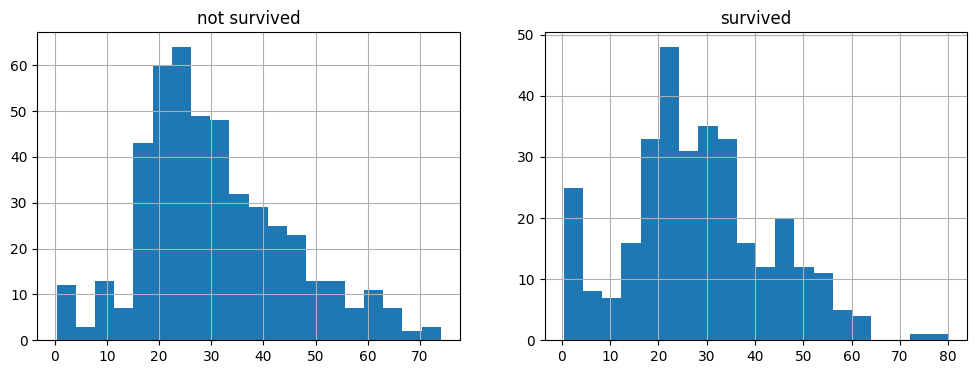

0.519
0.454
14
0.072
36.984
0.472
0.703


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

df = pd.read_csv('titanic_train.csv')

age_na_count = df['age'].isna().sum()
print(age_na_count)

survived_share = df['survived'].mean()
print(round(survived_share, 3))

cols_high_na = df.columns[df.isna().mean() > 1/3]
df_origin = df.drop(columns=cols_high_na)

df_origin['fam_size'] = df_origin['sibsp'] + df_origin['parch']
df_origin = df_origin.drop(columns=['sibsp', 'parch'])

if 'ticket' in df_origin.columns:
    df_origin = df_origin.drop(columns=['ticket'])

fam_size_mean = df_origin['fam_size'].mean()
print(round(fam_size_mean, 3))

n_predictors = df_origin.drop(columns=['survived']).shape[1]
print(n_predictors)

prob_male_p2 = df_origin[(df_origin['sex'] == 'male') & (df_origin['pclass'] == 2)]['survived'].mean()
print(round(prob_male_p2, 3))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df_origin[df_origin['survived'] == 0]['age'].hist(bins=20)
plt.title('not survived')

plt.subplot(1, 2, 2)
df_origin[df_origin['survived'] == 1]['age'].hist(bins=20)
plt.title('survived')

plt.show()

df_num = df_origin.select_dtypes(include='number')

df_num_no_na = df_num.dropna()
X = df_num_no_na.drop(columns=['survived'])
y = df_num_no_na['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=105, stratify=y
)

model = LogisticRegression(random_state=105, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_dropna = f1_score(y_test, y_pred)
print(round(f1_dropna, 3))

df_num_mean = df_num.copy()
for col in df_num_mean.columns:
    if df_num_mean[col].isna().any():
        df_num_mean[col] = df_num_mean[col].fillna(df_num_mean[col].mean())

X = df_num_mean.drop(columns=['survived'])
y = df_num_mean['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=105, stratify=y
)

model = LogisticRegression(random_state=105, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_mean = f1_score(y_test, y_pred)
print(round(f1_mean, 3))

df_h = df_origin.copy()
df_h['honorific'] = df_h['name'].str.extract(r',\s*([^\.]*)\.')[0].str.strip()
df_h['honorific'] = df_h['honorific'].str.replace('the ', '', regex=False)

unique_honorifics = df_h['honorific'].nunique()
print(unique_honorifics)

mr_titles = ['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']
mrs_titles = ['Dona', 'Countess']
miss_titles = ['Mlle', 'Ms']

replace_map = {}
for t in mr_titles:
    replace_map[t] = 'Mr'
for t in mrs_titles:
    replace_map[t] = 'Mrs'
for t in miss_titles:
    replace_map[t] = 'Miss'

df_h['honorific'] = df_h['honorific'].replace(replace_map)

mask_male = df_h['sex'] == 'male'
share_master_male = (df_h.loc[mask_male, 'honorific'] == 'Master').mean()
print(round(share_master_male, 3))

mrs_age_mean = df_h.loc[df_h['honorific'] == 'Mrs', 'age'].mean()
print(round(mrs_age_mean, 3))

group_means = df_h.groupby('honorific')['age'].transform('mean')
df_h['age'] = df_h['age'].fillna(group_means)

df_h_num = df_h.select_dtypes(include='number')
X = df_h_num.drop(columns=['survived'])
y = df_h_num['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=105, stratify=y
)

model = LogisticRegression(random_state=105, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_honorific = f1_score(y_test, y_pred)
print(round(f1_honorific, 3))

df_cat = df_origin.copy()
df_cat['honorific'] = df_cat['name'].str.extract(r',\s*([^\.]*)\.')[0].str.strip()
df_cat['honorific'] = df_cat['honorific'].replace(replace_map)

group_means = df_cat.groupby('honorific')['age'].transform('mean')
df_cat['age'] = df_cat['age'].fillna(group_means)

df_cat = df_cat.drop(columns=['name', 'honorific'])

y = df_cat['survived']
X = df_cat.drop(columns=['survived'])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=105, stratify=y
)

model = LogisticRegression(random_state=105, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_cat = f1_score(y_test, y_pred)
print(round(f1_cat, 3))
